In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd '/content/drive/MyDrive/Project_682'

Mounted at /content/drive/
/content/drive/MyDrive/Project_682


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image
import seaborn as sns

## Loading and Cleaning Metadata

In [ ]:
metadata = pd.read_csv('HAM10000_metadata.csv')

In [ ]:
metadata

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


In [ ]:
metadata.shape

(10015, 8)

In [ ]:
metadata.dtypes

lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
dataset          object
dtype: object

In [ ]:
metadata.describe(include='all')

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
count,10015,10015,10015,10015,9958.000000,10015,10015,10015
unique,7470,10015,7,4,NaN,3,15,4
top,HAM_0000835,ISIC_0033833,nv,histo,NaN,male,back,vidir_molemax
freq,6,1,6705,5340,NaN,5406,2192,3954
mean,NaN,NaN,NaN,NaN,51.863828,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,16.968614,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,65.000000,NaN,NaN,NaN


In [ ]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
dtypes: float64(1), object(7)
memory usage: 626.1+ KB


In [ ]:
metadata.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dataset          0
dtype: int64

In [ ]:
mean = int(metadata['age'].mean())
metadata['age'].fillna(mean,inplace=True)

In [ ]:
metadata.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dataset         0
dtype: int64

In [ ]:
lesion_type = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [ ]:
metadata['lesion_type'] = metadata['dx'].map(lesion_type.get) 
metadata['lesion_type_idx'] = pd.Categorical(metadata['lesion_type']).codes

In [ ]:
#Now time to read images based on image ID from the CSV file
#This is the safest way to read images as it ensures the right image is read for the right ID
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('', '*', '*.jpg'))}

In [ ]:
#Define the path and add as a new column
metadata['path'] = metadata['image_id'].map(image_path.get)

In [ ]:
#Use the path to read images.
metadata['image'] = metadata['path'].map(lambda x: np.asarray(Image.open(x).resize((125,100))))

In [ ]:
print(metadata['dx'].value_counts())

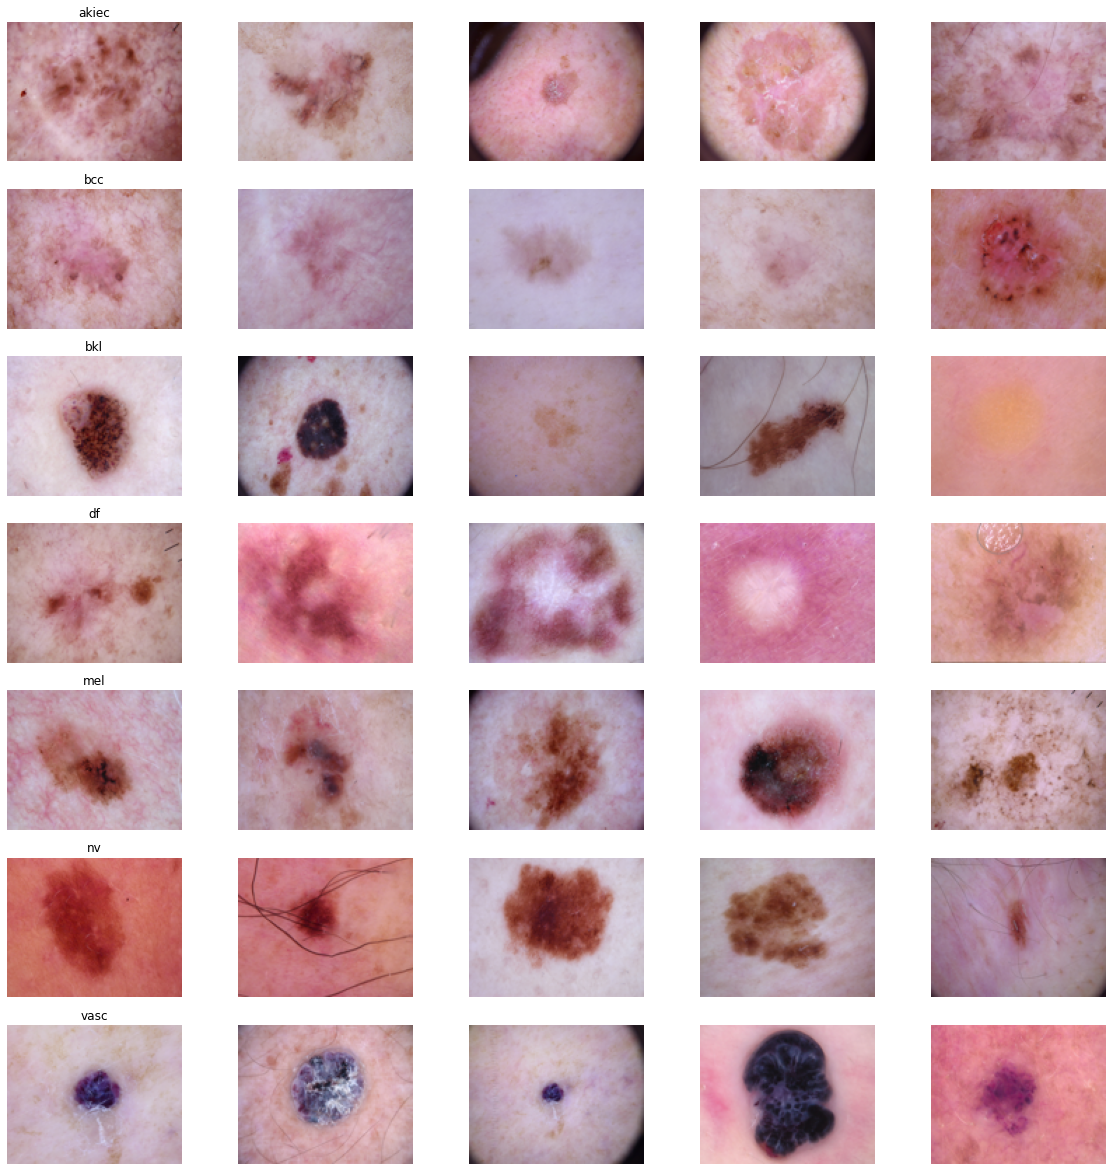

In [ ]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         metadata.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1998).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [ ]:
#df = metadata.loc[metadata['age']==0]

In [ ]:
#df.shape

## **Univariate Plots**

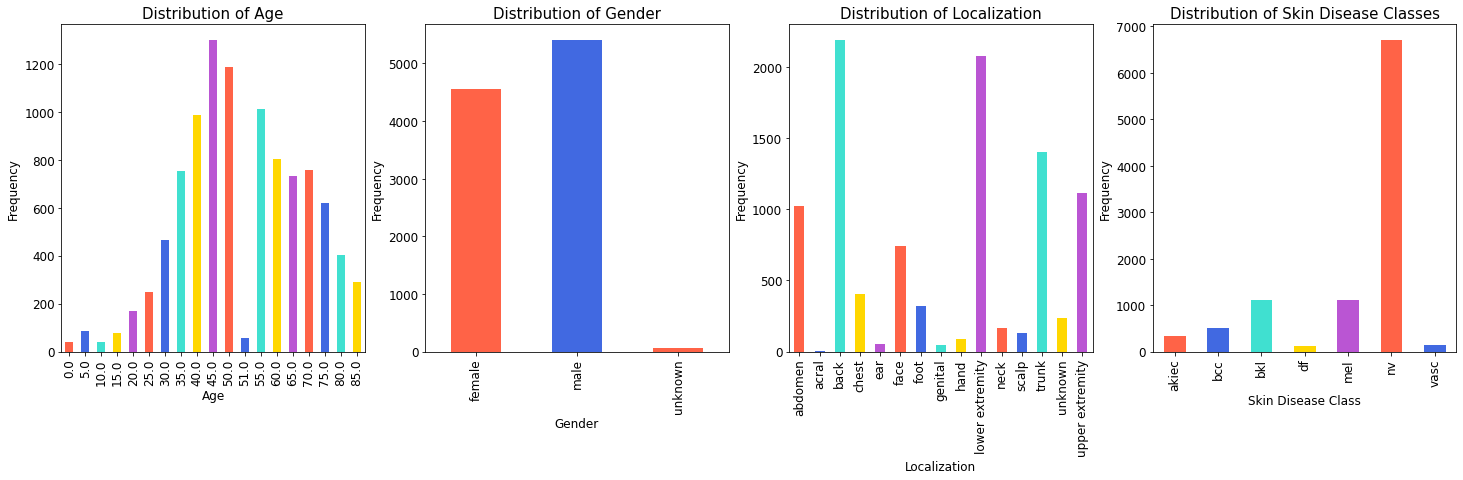

In [ ]:
plt.figure(figsize=(25,10))
plt.subplots_adjust(left=0.125, bottom=1, right=0.9, top=2, hspace=0.2)

plt.subplot(2,4,1)
plt.title("Distribution of Age",fontsize=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel("Frequency",fontsize=12)
metadata['age'].value_counts().sort_index().plot.bar(color = ('tomato','royalblue','turquoise','gold','mediumorchid'),fontsize=12)

plt.subplot(2,4,2)
plt.title("Distribution of Gender",fontsize=15)
plt.xlabel('Gender',fontsize=12)
plt.ylabel("Frequency",fontsize=12)
metadata['sex'].value_counts().sort_index().plot.bar(color = ('tomato','royalblue'),fontsize=12)

plt.subplot(2,4,3)
plt.title("Distribution of Localization",fontsize=15)
plt.xlabel('Localization',fontsize=12)
plt.ylabel("Frequency",fontsize=12)
#plt.xticks(rotation=45)
metadata['localization'].value_counts().sort_index().plot.bar(color = ('tomato','royalblue','turquoise','gold','mediumorchid'),fontsize=12)

plt.subplot(2,4,4)
plt.title("Distribution of Skin Disease Classes",fontsize=15)
plt.xlabel('Skin Disease Class',fontsize=12)
plt.ylabel("Frequency",fontsize=12)
metadata['dx'].value_counts().sort_index().plot.bar(color = ('tomato','royalblue','turquoise','gold','mediumorchid'),fontsize=12)

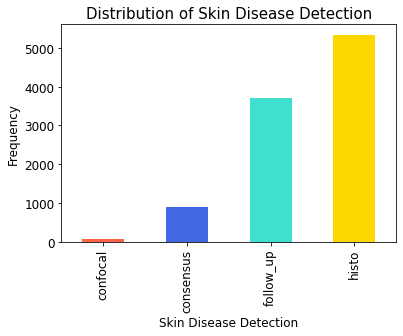

In [ ]:
plt.title("Distribution of Skin Disease Detection",fontsize=15)
plt.xlabel('Skin Disease Detection',fontsize=12)
plt.ylabel("Frequency",fontsize=12)
metadata['dx_type'].value_counts().sort_index().plot.bar(color = ('tomato','royalblue','turquoise','gold','mediumorchid'),fontsize=12)

In [ ]:
# Removing 'unknown' gender and age = 0

metadata= metadata[metadata['sex'] != 'unknown']
metadata = metadata[metadata['age'] != 0]
metadata.shape

(9921, 12)

In [ ]:
metadata['dx'].value_counts()

nv       6630
mel      1113
bkl      1084
bcc       514
akiec     327
vasc      138
df        115
Name: dx, dtype: int64

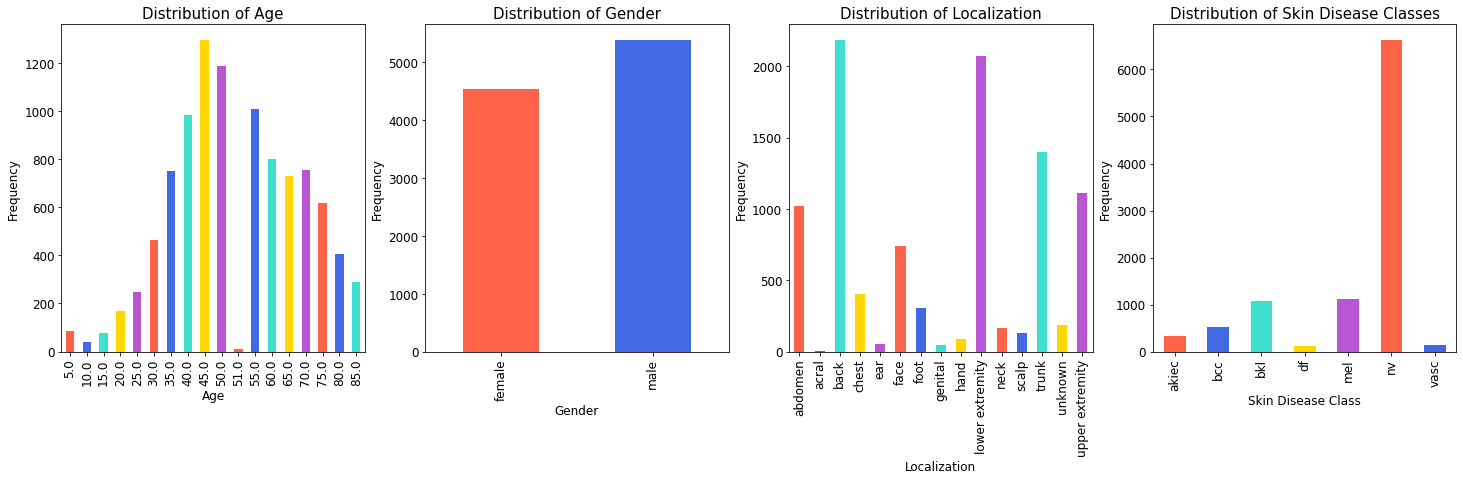

In [ ]:
plt.figure(figsize=(25,10))
plt.subplots_adjust(left=0.125, bottom=1, right=0.9, top=2, hspace=0.2)

plt.subplot(2,4,1)
plt.title("Distribution of Age",fontsize=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel("Frequency",fontsize=12)
metadata['age'].value_counts().sort_index().plot.bar(color = ('tomato','royalblue','turquoise','gold','mediumorchid'),fontsize=12)

plt.subplot(2,4,2)
plt.title("Distribution of Gender",fontsize=15)
plt.xlabel('Gender',fontsize=12)
plt.ylabel("Frequency",fontsize=12)
metadata['sex'].value_counts().sort_index().plot.bar(color = ('tomato','royalblue'),fontsize=12)

plt.subplot(2,4,3)
plt.title("Distribution of Localization",fontsize=15)
plt.xlabel('Localization',fontsize=12)
plt.ylabel("Frequency",fontsize=12)
#plt.xticks(rotation=45)
metadata['localization'].value_counts().sort_index().plot.bar(color = ('tomato','royalblue','turquoise','gold','mediumorchid'),fontsize=12)

plt.subplot(2,4,4)
plt.title("Distribution of Skin Disease Classes",fontsize=15)
plt.xlabel('Skin Disease Class',fontsize=12)
plt.ylabel("Frequency",fontsize=12)
metadata['dx'].value_counts().sort_index().plot.bar(color = ('tomato','royalblue','turquoise','gold','mediumorchid'),fontsize=12)

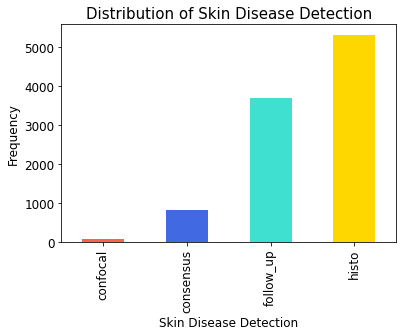

In [ ]:
plt.title("Distribution of Skin Disease Detection",fontsize=15)
plt.xlabel('Skin Disease Detection',fontsize=12)
plt.ylabel("Frequency",fontsize=12)
metadata['dx_type'].value_counts().sort_index().plot.bar(color = ('tomato','royalblue','turquoise','gold','mediumorchid'),fontsize=12)

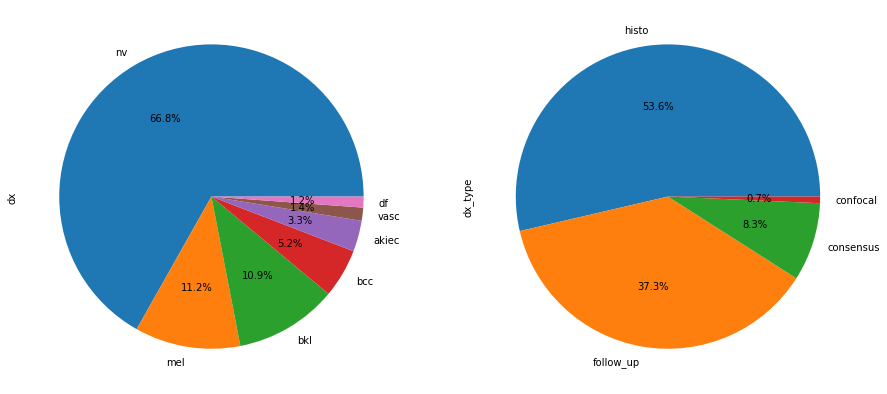

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
metadata['dx'].value_counts().plot.pie(autopct="%1.1f%%")
plt.subplot(1,2,2)
metadata['dx_type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

# **Bivariate Analysis**

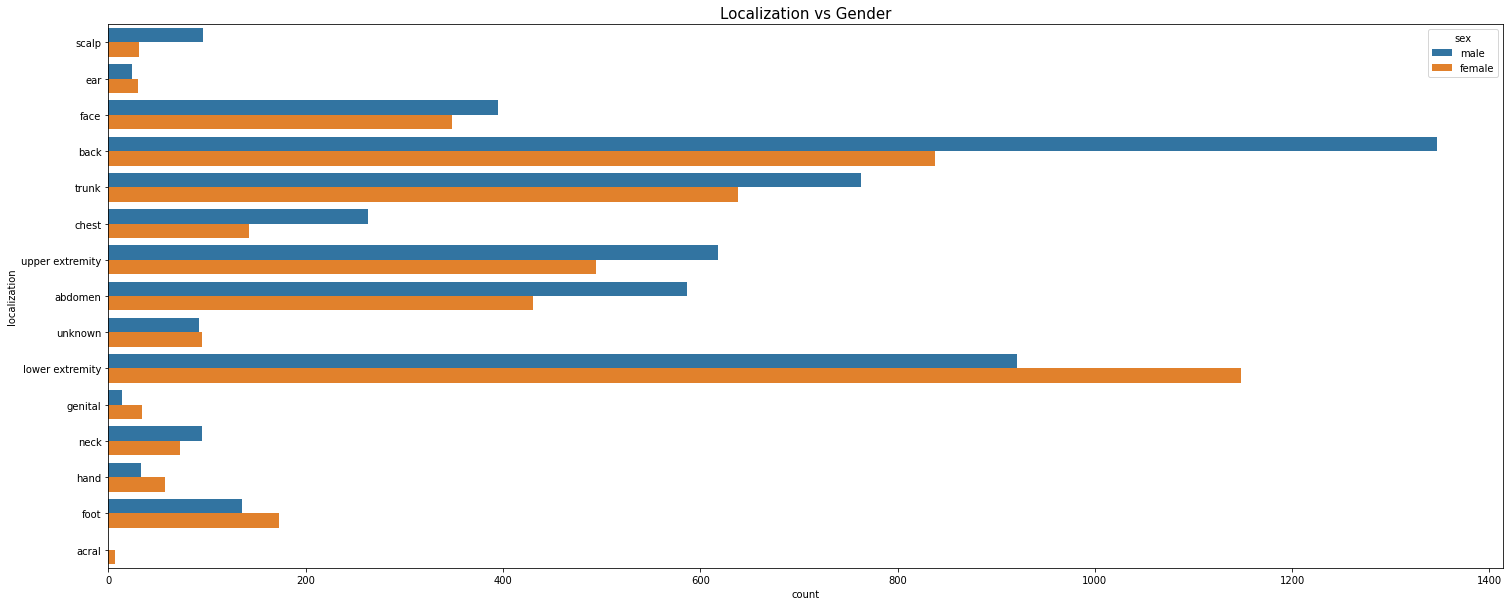

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Localization vs Gender',fontsize = 15)
sns.countplot(y='localization', hue='sex',data=metadata)

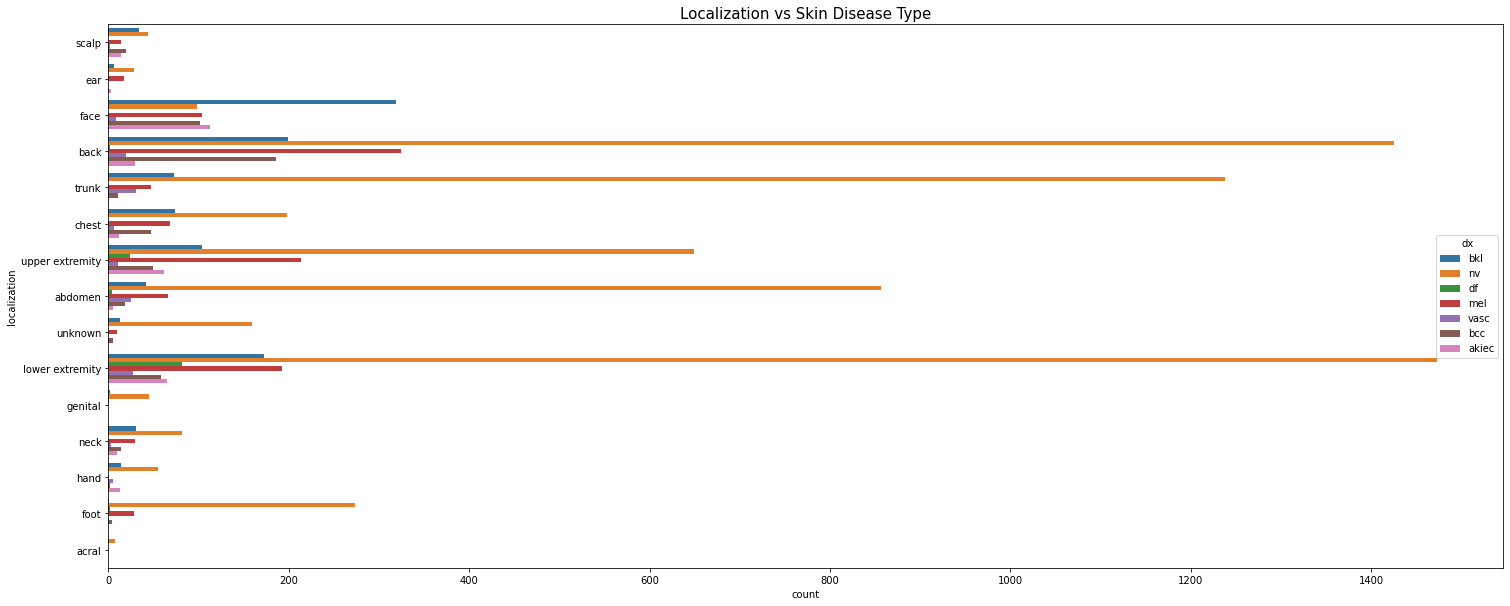

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Localization vs Skin Disease Type',fontsize = 15)
sns.countplot(y='localization', hue='dx',data=metadata)

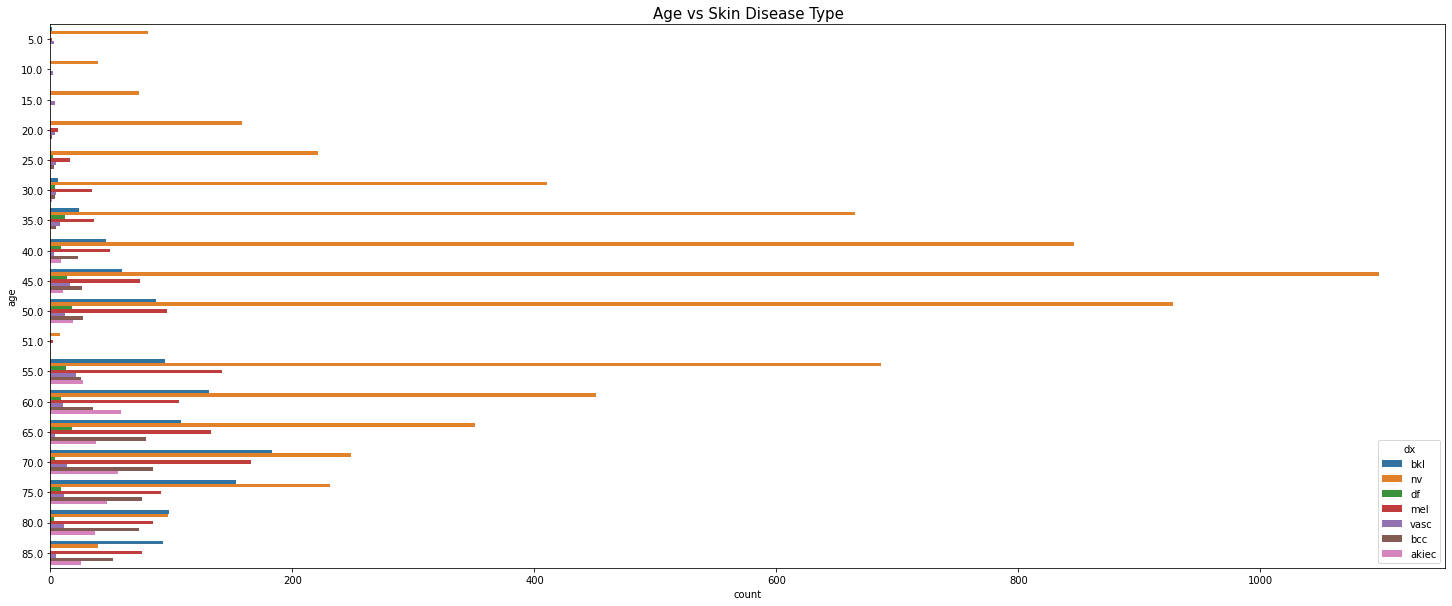

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Age vs Skin Disease Type',fontsize = 15)
sns.countplot(y='age', hue='dx',data=metadata)

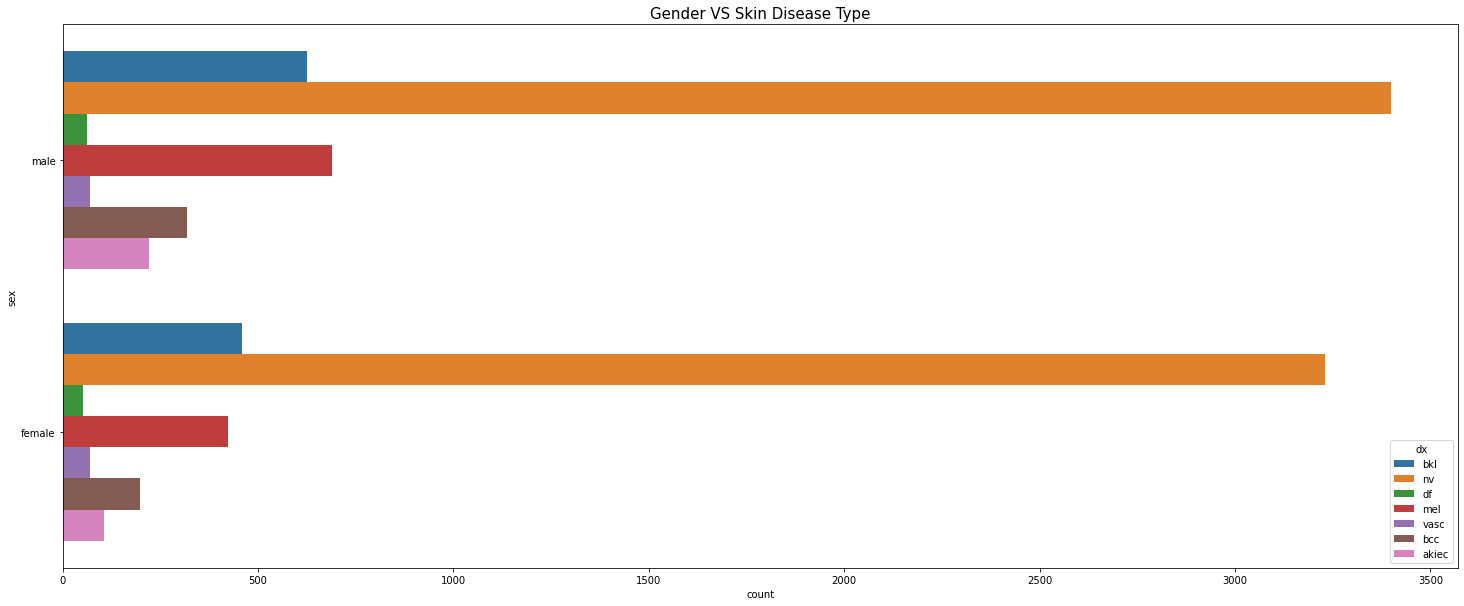

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Gender VS Skin Disease Type',fontsize = 15)
sns.countplot(y='sex', hue='dx',data=metadata)

In [ ]:
metadata = metadata.reset_index(drop=True)
metadata.shape

(9921, 12)

## Resize

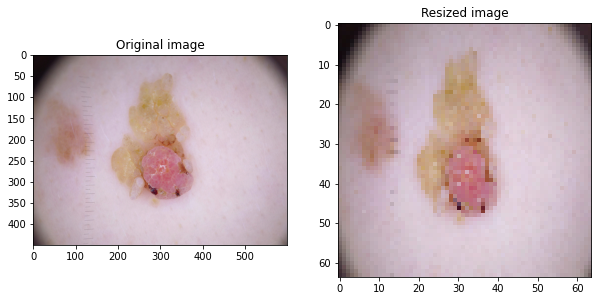

In [ ]:
# read the first image
file_to_read = metadata['path'][10]

import cv2
from cv2 import imread, resize

img = imread(file_to_read)
img2 = resize(img,(64,64))

# show one exampe image

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1])
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(img2[:,:,::-1])
plt.title('Resized image')
plt.show()

## Data Augmentation

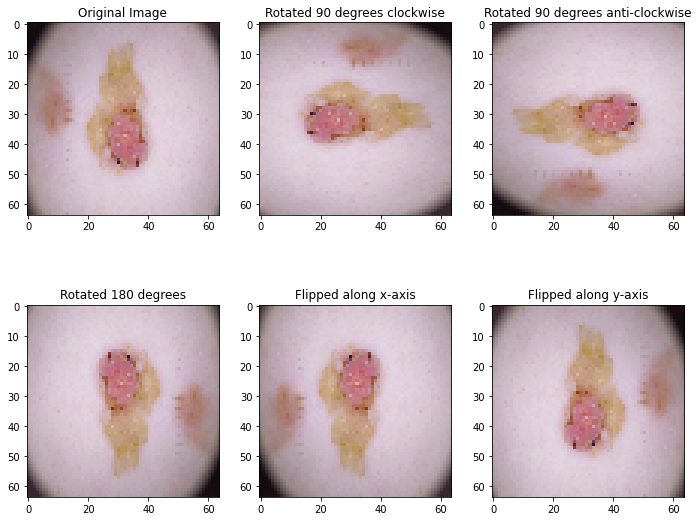

In [ ]:
def produce_new_img(img2):
    imga = cv2.rotate(img2,cv2.ROTATE_90_CLOCKWISE)
    imgb = cv2.rotate(img2,cv2.ROTATE_90_COUNTERCLOCKWISE)
    imgc = cv2.rotate(img2,cv2.ROTATE_180)
    imgd = cv2.flip(img2,0)
    imge = cv2.flip(img2,1)
    return imga,imgb,imgc,imgd,imge

new_img = produce_new_img(img2)
l = ['Original Image','Rotated 90 degrees clockwise','Rotated 90 degrees anti-clockwise','Rotated 180 degrees','Flipped along x-axis','Flipped along y-axis']
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
plt.title(l[0])
plt.imshow(img2[:,:,::-1])
for i in range(5):
    plt.subplot(2,3,2+i)
    plt.imshow(new_img[i][:,:,::-1])
    plt.title(l[i+1])
plt.tight_layout()
plt.show()

In [ ]:
X = []
y = []

for i in range(len(metadata)):
    file_to_read = metadata['path'][i]
    img = imread(file_to_read)
    img2 = resize(img,(125,100))
    X.append(img2)
    
    #targets
    output = metadata['lesion_type_idx'][i]
    y.append(output)
    
    # add more images for class between 1-6, rotating them 
    if output != 4:
        new_img = produce_new_img(img2)
        for i in range(5):
            X.append(new_img[i])
            y.append(output)
       
    if i % int(1000) == 0:
        print(i,'images loaded')

3000 images loaded
4000 images loaded
5000 images loaded
6000 images loaded
7000 images loaded
8000 images loaded
9000 images loaded


In [ ]:
y.count(0)

1962

In [ ]:
y.count(1)

3084

In [ ]:
y.count(2)

6504

In [ ]:
y.count(3)

690

In [ ]:
y.count(4)

6630

In [ ]:
y.count(5)

6678

In [ ]:
y.count(6)

828

In [ ]:
X[0].shape

(100, 125, 3)

In [ ]:
len(X)

26376

## Denoise

In [ ]:
import cv2
kernel = cv2.getStructuringElement(1,(17,17)) # Kernel for the morphological filtering

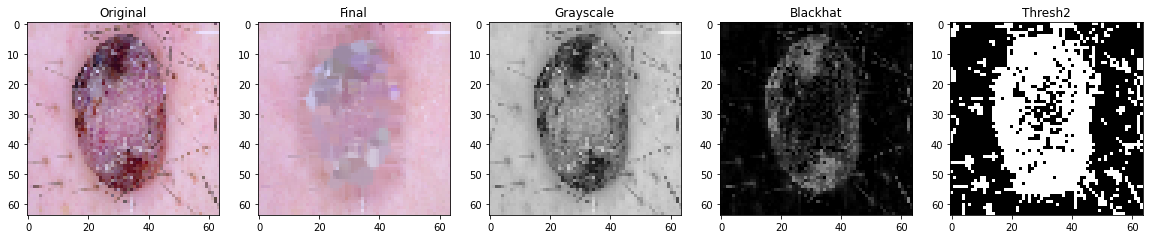

In [ ]:

src = cv2.imread(metadata['path'][19])
src = resize(src,(64,64))
grayScale = cv2.cvtColor( src, cv2.COLOR_RGB2GRAY ) #1 Convert the original image to grayscale
blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel) #2 Perform the blackHat filtering on the grayscale image to find the hair countours
ret,thresh2 = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY) # intensify the hair countours in preparation for the inpainting algorithm
dst = cv2.inpaint(src,thresh2,1,cv2.INPAINT_TELEA) # inpaint the original image depending on the mask

plt.figure(figsize=(20,10))
plt.subplot(1,5,1).set_title('Original')
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.subplot(1,5,3).set_title('Grayscale')
plt.imshow(cv2.cvtColor(grayScale, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.subplot(1,5,4).set_title('Blackhat')
plt.imshow(cv2.cvtColor(blackhat, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.subplot(1,5,5).set_title('Thresh2')
plt.imshow(cv2.cvtColor(thresh2, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.subplot(1,5,2).set_title('Final')
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB), interpolation='nearest')

In [ ]:
dst.shape

(450, 600, 3)

In [ ]:
dt = pd.DataFrame(columns=['age', 'sex', 'localization', 'dx_type', 'diagnosis', 'class', 'img_dim'])